In [16]:
import numpy as np

from collections import namedtuple

import matplotlib.pyplot as plt

%matplotlib inline

## Let's define body

In [91]:
Body = namedtuple('Body', ['m', 'x', 'y', 'dot_x', 'dot_y'])

## And physics

In [92]:
def calc_force(b0, b1):
#     G = 6.674 * (10 ** -14)
    G = 1.0
    
    dx = b1.x - b0.x
    dy = b1.y - b0.y
    
    r = (dx ** 2 + dy ** 2) ** 0.5
    F = G * b0.m * b1.m / r ** 2
    
    
    if dx != 0:
        Fx_01 = F * dx / r
    else:
        Fx_01 = 0
    
    if dy != 0:
        Fy_01 = F * dy / r
    else:
        Fy_01 = 0

    return Fx_01, Fy_01


def move_body(b, Fx, Fy, dt):
    dot_dot_x = Fx / b.m
    new_x = b.x + b.dot_x * dt + dot_dot_x * (dt ** 2) * 0.5
    new_dot_x = b.dot_x + dot_dot_x * dt
    
    dot_dot_y = Fy / b.m
    new_y = b.y + b.dot_y * dt + dot_dot_y * (dt ** 2) * 0.5
    new_dot_y = b.dot_y + dot_dot_y * dt
    
    new_b = Body(b.m, new_x, new_y, new_dot_x, new_dot_y)
    return new_b

## And run it together

In [93]:
def calc_trajectories(b0, b1, b2, dt, n_steps):
    trj_0 = [[b0.x, b0.y]]
    trj_1 = [[b1.x, b1.y]]
    trj_2 = [[b2.x, b2.y]]
    
    for step in range(n_steps):
        # Forces
        Fx_01, Fy_01 = calc_force(b0, b1)
        Fx_02, Fy_02 = calc_force(b0, b2)
        Fx_12, Fy_12 = calc_force(b1, b2)
        
        Fx_0 = Fx_01 + Fx_02
        Fy_0 = Fy_01 + Fy_02
        
        Fx_1 = - Fx_01 + Fx_12
        Fy_1 = - Fy_01 + Fy_12
        
        Fx_2 = - Fx_02 - Fx_12
        Fy_2 = - Fy_02 - Fy_12
        
        # Move everything
        b0 = move_body(b0, Fx_0, Fy_0, dt)
        b1 = move_body(b1, Fx_1, Fy_1, dt)
        b2 = move_body(b2, Fx_2, Fy_2, dt)
        
        # Save positions
        trj_0.append([b0.x, b0.y])
        trj_1.append([b1.x, b1.y])
        trj_2.append([b2.x, b2.y])
        
    return np.array(trj_0), np.array(trj_1), np.array(trj_2)

## Test run

In [105]:
# Init states
b0 = Body(1., 0., 0., 0.1, 0.1)
b1 = Body(1., 0., 1., 0., -0.1)
b2 = Body(1., 1., 0., -0.1, 0.1)

t0, t1, t2 = calc_trajectories(b0, b1, b2, 0.001, 10**3)

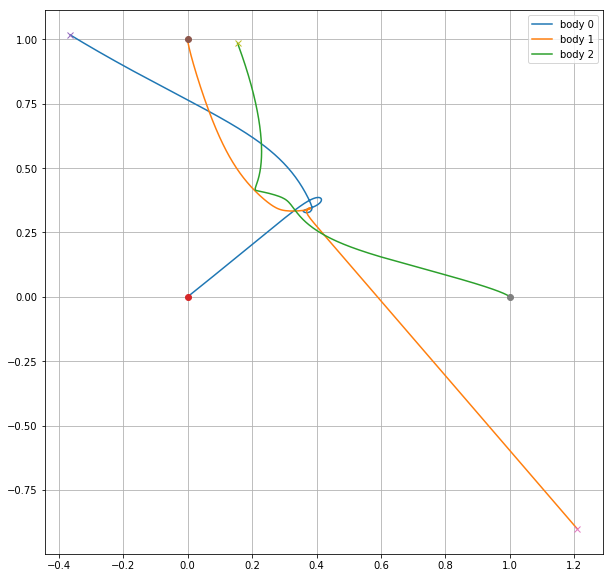

In [106]:
plt.figure(figsize=(10, 10))
plt.plot(t0[:, 0], t0[:, 1], label='body 0')
plt.plot(t1[:, 0], t1[:, 1], label='body 1')
plt.plot(t2[:, 0], t2[:, 1], label='body 2')

plt.plot(t0[0, 0], t0[0, 1], marker='o')
plt.plot(t0[-1, 0], t0[-1, 1], marker='x')

plt.plot(t1[0, 0], t1[0, 1], marker='o')
plt.plot(t1[-1, 0], t1[-1, 1], marker='x')

plt.plot(t2[0, 0], t2[0, 1], marker='o')
plt.plot(t2[-1, 0], t2[-1, 1], marker='x')

plt.legend()
plt.grid()